In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Add src to path
sys.path.insert(0, '../src')

from retis.algorithm import RETISRegressor, RETISClassifier
from retis.data import load_california_housing_data, load_breast_cancer_data
from retis.evaluation import train_and_evaluate, compare_models

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Regression Task: California Housing Dataset

### 1.1 Load Data

In [2]:
# Load California Housing dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg, feature_names = load_california_housing_data(
    test_size=0.2, random_state=42, scale=True
)

print(f"Training samples: {X_train_reg.shape[0]}")
print(f"Test samples: {X_test_reg.shape[0]}")
print(f"Number of features: {X_train_reg.shape[1]}")
print(f"Features: {feature_names}")

Training samples: 16512
Test samples: 4128
Number of features: 8
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### 1.2 Train Models

We compare RETIS against:
1. Decision Tree Regressor
2. Random Forest Regressor
3. Gradient Boosting Regressor

In [3]:
# Initialize models
regression_models = {
    'RETIS': RETISRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=10),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Train and evaluate each model
regression_results = {}
for name, model in regression_models.items():
    print(f"\nTraining {name}...")
    fitted_model, results = train_and_evaluate(
        model, X_train_reg, X_test_reg, y_train_reg, y_test_reg,
        model_name=name, task='regression'
    )
    regression_results[name] = results
    regression_models[name] = fitted_model
    print(f"Test RMSE: {results['test_rmse']:.4f}, Test R2: {results['test_r2']:.4f}")


Training RETIS...
Test RMSE: 0.6115, Test R2: 0.7146

Training Decision Tree...
Test RMSE: 0.7242, Test R2: 0.5997

Training Random Forest...
Test RMSE: 0.6115, Test R2: 0.7146

Training Decision Tree...
Test RMSE: 0.7242, Test R2: 0.5997

Training Random Forest...
Test RMSE: 0.6803, Test R2: 0.6468

Training Gradient Boosting...
Test RMSE: 0.6803, Test R2: 0.6468

Training Gradient Boosting...
Test RMSE: 0.4977, Test R2: 0.8110
Test RMSE: 0.4977, Test R2: 0.8110


### 1.3 Compare Results

In [4]:
# Create comparison DataFrame
regression_comparison = pd.DataFrame(regression_results).T
regression_comparison = regression_comparison[['test_rmse', 'test_mae', 'test_r2', 'fit_time', 'test_time']]
regression_comparison.columns = ['Test RMSE', 'Test MAE', 'Test R²', 'Training Time (s)', 'Prediction Time (s)']

print("\n" + "="*80)
print("REGRESSION RESULTS - California Housing Dataset")
print("="*80)
print(regression_comparison.to_string())
print("\nBest Test RMSE:", regression_comparison['Test RMSE'].idxmin())
print("Best Test R²:", regression_comparison['Test R²'].idxmax())


REGRESSION RESULTS - California Housing Dataset
                  Test RMSE  Test MAE   Test R² Training Time (s) Prediction Time (s)
RETIS              0.611547  0.423991    0.7146           62.9067            0.199887
Decision Tree      0.724234  0.522259  0.599732           0.09041             0.00051
Random Forest      0.680319  0.490481  0.646802          5.673219            0.033095
Gradient Boosting  0.497673  0.334909  0.810992          8.682171            0.014458

Best Test RMSE: Gradient Boosting
Best Test R²: Gradient Boosting


### 1.4 Visualize Results

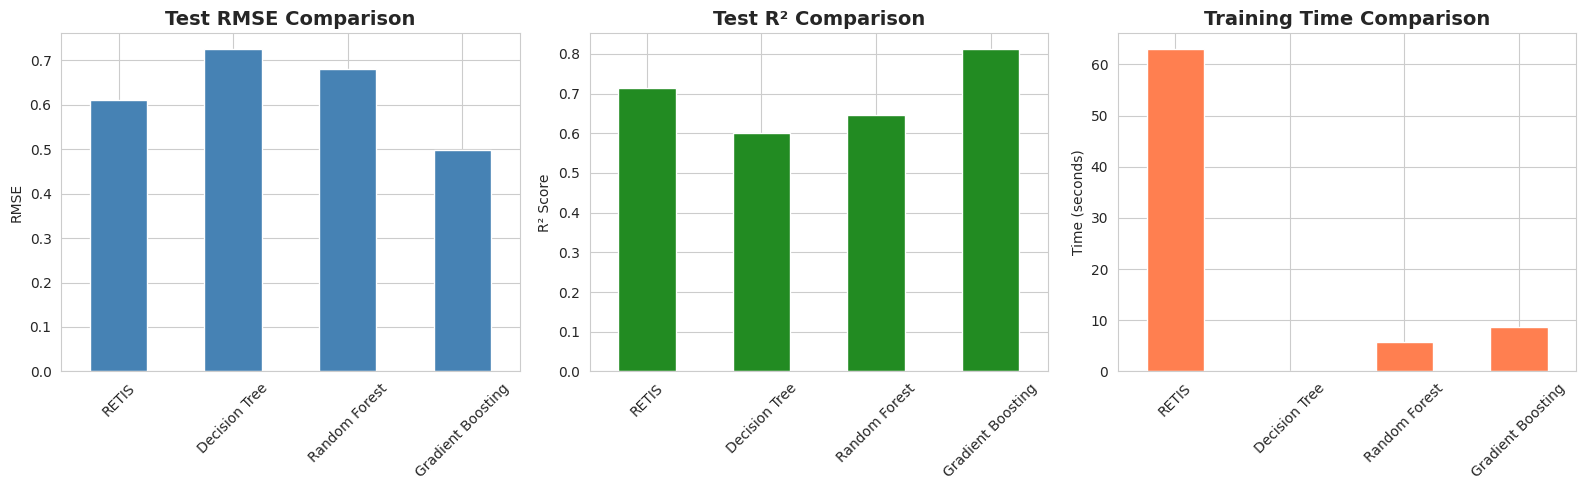

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# RMSE comparison
regression_comparison['Test RMSE'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# R² comparison
regression_comparison['Test R²'].plot(kind='bar', ax=axes[1], color='forestgreen')
axes[1].set_title('Test R² Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

# Training time comparison
regression_comparison['Training Time (s)'].plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Time (seconds)')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. Classification Task: Breast Cancer Wisconsin Dataset

### 2.1 Load Data

In [6]:
# Load Breast Cancer Wisconsin dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf, feature_names_clf, target_names = load_breast_cancer_data(
    test_size=0.2, random_state=42, scale=True
)

print(f"Training samples: {X_train_clf.shape[0]}")
print(f"Test samples: {X_test_clf.shape[0]}")
print(f"Number of features: {X_train_clf.shape[1]}")
print(f"Target classes: {target_names}")
print(f"Class distribution (train): {np.bincount(y_train_clf.astype(int))}")

Training samples: 455
Test samples: 114
Number of features: 30
Target classes: ['malignant' 'benign']
Class distribution (train): [170 285]


### 2.2 Train Models

We compare RETIS against:
1. Decision Tree Classifier
2. Random Forest Classifier
3. Logistic Regression

In [7]:
# Initialize models
classification_models = {
    'RETIS': RETISClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
classification_results = {}
for name, model in classification_models.items():
    print(f"\nTraining {name}...")
    fitted_model, results = train_and_evaluate(
        model, X_train_clf, X_test_clf, y_train_clf, y_test_clf,
        model_name=name, task='classification'
    )
    classification_results[name] = results
    classification_models[name] = fitted_model
    print(f"Test Accuracy: {results['test_accuracy']:.4f}, Test F1: {results['test_f1']:.4f}")


Training RETIS...
Test Accuracy: 0.9386, Test F1: 0.9392

Training Decision Tree...
Test Accuracy: 0.9474, Test F1: 0.9474

Training Random Forest...
Test Accuracy: 0.9386, Test F1: 0.9392

Training Decision Tree...
Test Accuracy: 0.9474, Test F1: 0.9474

Training Random Forest...
Test Accuracy: 0.9561, Test F1: 0.9560

Training Logistic Regression...
Test Accuracy: 0.9825, Test F1: 0.9825
Test Accuracy: 0.9561, Test F1: 0.9560

Training Logistic Regression...
Test Accuracy: 0.9825, Test F1: 0.9825


### 2.3 Compare Results

In [8]:
# Create comparison DataFrame
classification_comparison = pd.DataFrame(classification_results).T
classification_comparison = classification_comparison[[
    'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'fit_time', 'test_time'
]]
classification_comparison.columns = [
    'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Training Time (s)', 'Prediction Time (s)'
]

print("\n" + "="*80)
print("CLASSIFICATION RESULTS - Breast Cancer Wisconsin Dataset")
print("="*80)
print(classification_comparison.to_string())
print("\nBest Test Accuracy:", classification_comparison['Test Accuracy'].idxmax())
print("Best Test F1:", classification_comparison['Test F1'].idxmax())


CLASSIFICATION RESULTS - Breast Cancer Wisconsin Dataset
                    Test Accuracy Test Precision Test Recall   Test F1 Training Time (s) Prediction Time (s)
RETIS                    0.938596       0.943541    0.938596  0.939217          2.741156            0.004262
Decision Tree            0.947368       0.947368    0.947368  0.947368          0.013381            0.000273
Random Forest             0.95614       0.956073     0.95614  0.956027          0.197141            0.006459
Logistic Regression      0.982456       0.982456    0.982456  0.982456          0.008461            0.000407

Best Test Accuracy: Logistic Regression
Best Test F1: Logistic Regression


### 2.4 Visualize Results

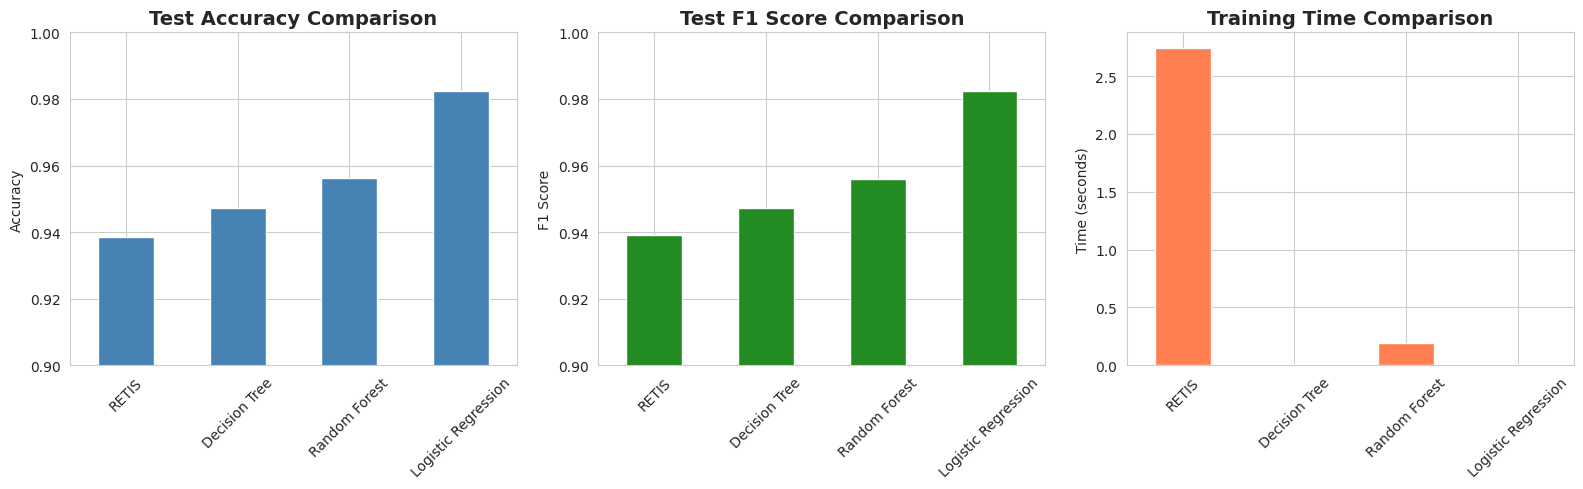

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Accuracy comparison
classification_comparison['Test Accuracy'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([0.9, 1.0])

# F1 Score comparison
classification_comparison['Test F1'].plot(kind='bar', ax=axes[1], color='forestgreen')
axes[1].set_title('Test F1 Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1 Score')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0.9, 1.0])

# Training time comparison
classification_comparison['Training Time (s)'].plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Time (seconds)')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.5 Confusion Matrix for RETIS

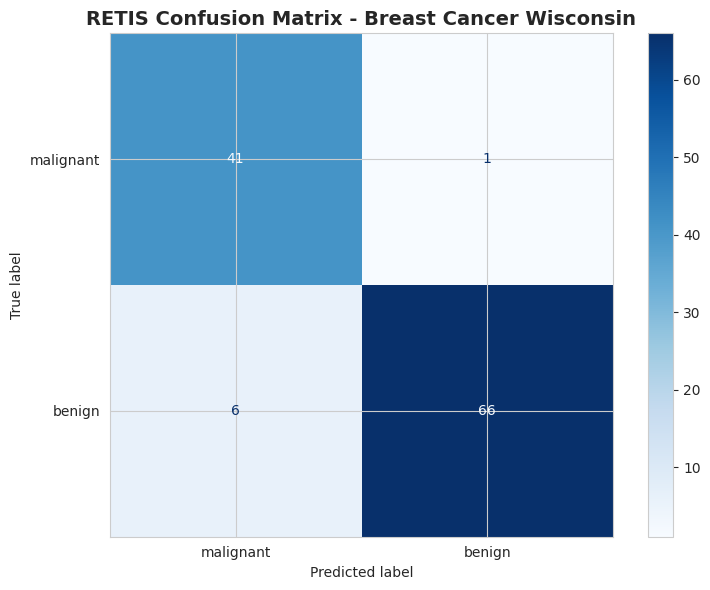

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = classification_models['RETIS'].predict(X_test_clf)
cm = confusion_matrix(y_test_clf, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title('RETIS Confusion Matrix - Breast Cancer Wisconsin', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Summary

### Key Findings

In [11]:
print("="*80)
print("OVERALL SUMMARY")
print("="*80)

print("\nREGRESSION TASK (California Housing):")
print(f"  RETIS Test RMSE: {regression_results['RETIS']['test_rmse']:.4f}")
print(f"  RETIS Test R²: {regression_results['RETIS']['test_r2']:.4f}")
print(f"  Best Model: {regression_comparison['Test RMSE'].idxmin()} (RMSE: {regression_comparison['Test RMSE'].min():.4f})")

print("\nCLASSIFICATION TASK (Breast Cancer Wisconsin):")
print(f"  RETIS Test Accuracy: {classification_results['RETIS']['test_accuracy']:.4f}")
print(f"  RETIS Test F1: {classification_results['RETIS']['test_f1']:.4f}")
print(f"  Best Model: {classification_comparison['Test Accuracy'].idxmax()} (Accuracy: {classification_comparison['Test Accuracy'].max():.4f})")

print("\n" + "="*80)

OVERALL SUMMARY

REGRESSION TASK (California Housing):
  RETIS Test RMSE: 0.6115
  RETIS Test R²: 0.7146
  Best Model: Gradient Boosting (RMSE: 0.4977)

CLASSIFICATION TASK (Breast Cancer Wisconsin):
  RETIS Test Accuracy: 0.9386
  RETIS Test F1: 0.9392
  Best Model: Logistic Regression (Accuracy: 0.9825)

